In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df = pd.read_csv('train.csv')
df.describe().T # look at scale of data

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


In [50]:
df.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [51]:
y = df.medv
X = df.drop(columns=['medv'])

# Baseline

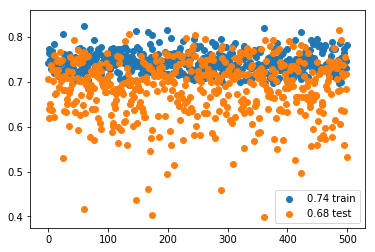

In [52]:
scores_train = []
scores_test  = []
iterations = 500
for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    model = LinearRegression().fit(X_train, y_train)
    yhat_train = model.predict(X_train)
    yhat_test  = model.predict(X_test)
    r2_train  = r2_score(y_train, yhat_train)
    r2_test  = r2_score(y_test, yhat_test)
    scores_train.append(r2_train)
    scores_test.append(r2_test)
    
scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

plt.scatter(range(iterations), scores_train, label='{0:.2f} train'.format(scores_train.mean()))
plt.scatter(range(iterations), scores_test, label='{0:.2f} test'.format(scores_test.mean()))
plt.legend()
plt.show()

In [53]:
model.intercept_, model.coef_

(9.500409296918125,
 array([-3.67976869e-03,  1.70943301e-02,  2.50910339e-02, -5.02469321e-03,
         4.85166541e+00, -9.92285097e+00,  6.30220068e+00, -4.98409827e-02,
        -1.33961458e+00,  1.56174095e-01, -5.60129030e-03, -7.55832904e-01,
         1.66275723e-02, -2.92737130e-01]))

# Splitting and Scaling

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
kf = KFold(n_splits=5)

/home/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# K-Fold Cross Validation

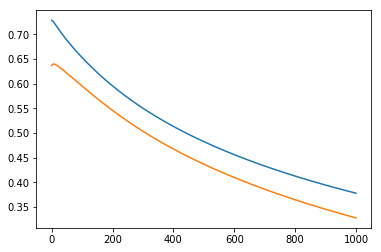

In [55]:
betas = []
scores_train = []
scores_val  = []
# do first --- alphas = [10**i for i in range(-5, 8)]
alphas = np.linspace(0, 1000, 200) # change back to 100
for alpha in alphas:
    tk_scores = []
    vk_scores = []
    bk_values = []
    for train_index, validation_index in kf.split(X_train):
        Xt = X_train[train_index]
        yt = y_train.iloc[train_index]
        Xv = X_train[validation_index]
        yv = y_train.iloc[validation_index]

        model = Ridge(alpha=alpha).fit(Xt, yt)
        tk_scores.append(r2_score(yt, model.predict(Xt)))
        vk_scores.append(r2_score(yv, model.predict(Xv)))
        bk_values.append(model.coef_)

    train_mean = sum(tk_scores) / kf.get_n_splits()
    val_mean = sum(vk_scores) / kf.get_n_splits()
    betas_mean = np.array(bk_values).mean(axis=0)
    
    scores_train.append(train_mean)
    scores_val.append(val_mean)
    betas.append(betas_mean)

# do first --- plt.semilogx(alphas, scores_train)
# do first --- plt.semilogx(alphas, scores_val)
plt.plot(alphas, scores_train)
plt.plot(alphas, scores_val)
plt.show()

# Beta Coefficients

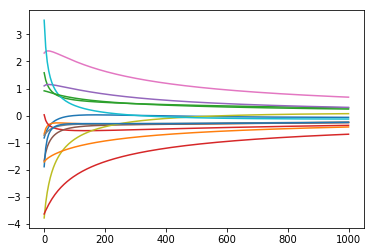

In [56]:
betas = np.array(betas)
for b in range(betas.shape[1]):
    plt.plot(alphas, betas[:,b])
plt.show()

# Final Testing

In [57]:
model = Ridge(alpha=10).fit(X_train, y_train)
yhat = model.predict(X_test)
r2_score(y_test, yhat)

0.7369193175005435

In [58]:
model = Ridge(alpha=0).fit(X_train, y_train)
yhat = model.predict(X_test)
r2_score(y_test, yhat)

0.7361853906546206

In [59]:
# small dataset ... better results with more data